# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [1]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
import matplotlib

     |████████████████████████████████| 120.8MB 826kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
     |████████████████████████████████| 450kB 1.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
     |████████████████████████████████| 112kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 2.6MB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 3.9MB 1.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
     |████████████████████████████████| 1.3MB 520kB/s eta 0:00:01
     |████████████████████████████████| 71kB 905kB/s eta 0:00:01
     |████████████████████████████████| 61kB 854k

     |████████████████████████████████| 163kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 886kB/s eta 0:00:01
     |████████████████████████████████| 153kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 743kB/s eta 0:00:01
  Stored in directory: /Users/saujasvs/Library/Caches/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Stored in directory: /Users/saujasvs/Library/Caches/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built absl-py pyyaml
     |████████████████████████████████| 14.3MB 511kB/s eta 0:00:01
  Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [184]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import pairwise_distances
from sklearn.utils.graph_shortest_path import graph_shortest_path
from sklearn.neighbors import kneighbors_graph

# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



In [302]:
# Part 1: Spectral Clustering
from sklearn.cluster import KMeans

def spectral_clustering(X, eig=[1, 2]):
    """Args:
    X: numpy.array [num_samples, input_dim]

    Returns:
    Y_pred: numpy.array [num_samples]
      array of cluster labels
    """
    W = np.exp(-0.5 * (1 / 0.01) * np.square(pairwise_distances(X)))
#     W = np.max(W) - W
    degree = np.diag(np.sum(W, axis=0))
    D = np.sqrt(np.linalg.inv(degree))
    L = np.identity(X.shape[0]) - D @ W @ D
    eigvals, eigvecs = np.linalg.eig(L)
    eigvals = np.real(eigvals)
    eigvecs = np.real(eigvecs)
    idx = np.argsort(eigvals)
    V = eigvecs[:, idx[eig]]
    n = np.linalg.norm(V, axis=1).reshape((X.shape[0], 1))
    U = np.array([(1 / n[i]) * V[i] if n[i] != 0 else np.zeros(len(eig)) for i in range(X.shape[0])])
    kmeans = KMeans(2)
    kmeans.fit(U)
    Y_pred = kmeans.labels_
    return Y_pred

## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [180]:
# DO NOT EDIT

from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

[]

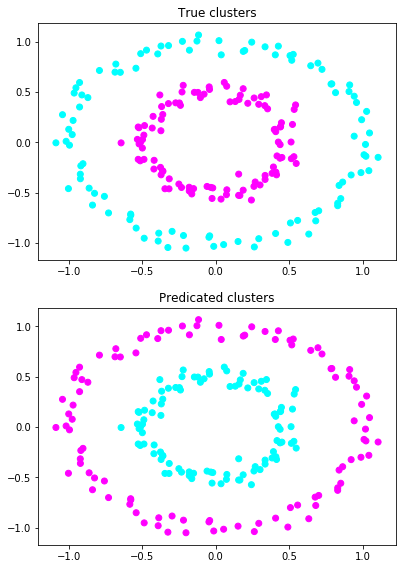

In [303]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)

CY_pred = spectral_clustering(CX)

fig = plt.figure(figsize=[6.4, 4.8 * 2])

ax1 = fig.add_subplot(211)
ax1.set_title("True clusters")
ax1.scatter(CX[:, 0], CX[:, 1], c=CY, cmap=plt.get_cmap("cool"))

ax2 = fig.add_subplot(212)
ax2.set_title("Predicated clusters")
ax2.scatter(CX[:, 0], CX[:, 1], c=CY_pred, cmap=plt.get_cmap("cool"))

plt.plot()

## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [304]:
# Part 3: Report the accuracy of clustering
def get_cluster_accuracy(y, y_pred):
    return max(np.sum(np.abs(y - y_pred)) / y.shape[0], np.sum(np.abs(y - (1 - y_pred))) / y.shape[0])

get_cluster_accuracy(CY, CY_pred)

1.0



---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

In [162]:
# Part 1: MDS
def MDS(X, k, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """

    D = pairwise_distances(X)
    S = np.square(D)
    H = np.identity(X.shape[0]) - (1 / X.shape[0]) * np.ones((X.shape[0], X.shape[0]))
    eigvals, eigvecs = np.linalg.eig(-0.5 * (H @ S @ H))
    eigvals = np.real(eigvals)
    eigvecs = np.real(eigvecs)
    idx = np.argsort(eigvals)[::-1]
    l = np.sqrt(eigvals[idx[:output_dim]])
    Y = eigvecs[:, idx[:output_dim]] @ np.diag(l)
    return Y

## Part 2: LLE
Implement Locally Linear Embedding function

In [90]:
# Part 2: LLE

def LLE(X, K, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """

    delta = 0.001
    
    G = kneighbors_graph(X, K, mode='distance')
    W = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        knn = [n[1] for n in G[i].todok().keys()]
        N = X[knn]
        d = X[i] - N
        C = np.array([[np.dot(d[j], d[k]) for k in range(K)] for j in range(K)]) + delta * np.identity(K)
        w = np.linalg.solve(C, np.ones((K,)))
        w = (1 / np.sum(w)) * w
        W[i][knn] = w
    
    Z = np.identity(X.shape[0]) - W
    M = Z.T @ Z
    eigvals, eigvecs = np.linalg.eig(M)
    idx = np.argsort(eigvals)
    Y = eigvecs[:, idx[1:output_dim + 1]]

    return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

In [164]:
# Part 3: Isomap
f

def ISOMAP(X, K, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
    G = kneighbors_graph(X, K, mode='distance')
    D = graph_shortest_path(G, method='FW')
    S = np.square(D)
    H = np.identity(X.shape[0]) - (1 / X.shape[0]) * np.ones((X.shape[0], X.shape[0]))
    eigvals, eigvecs = np.linalg.eig(-0.5 * (H @ S @ H))
    eigvals = np.real(eigvals)
    eigvecs = np.real(eigvecs)
    idx = np.argsort(eigvals)[::-1]
    l = np.sqrt(eigvals[idx[:output_dim]])
    Y = eigvecs[:, idx[:output_dim]] @ np.diag(l)
    return Y

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [48]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

[]

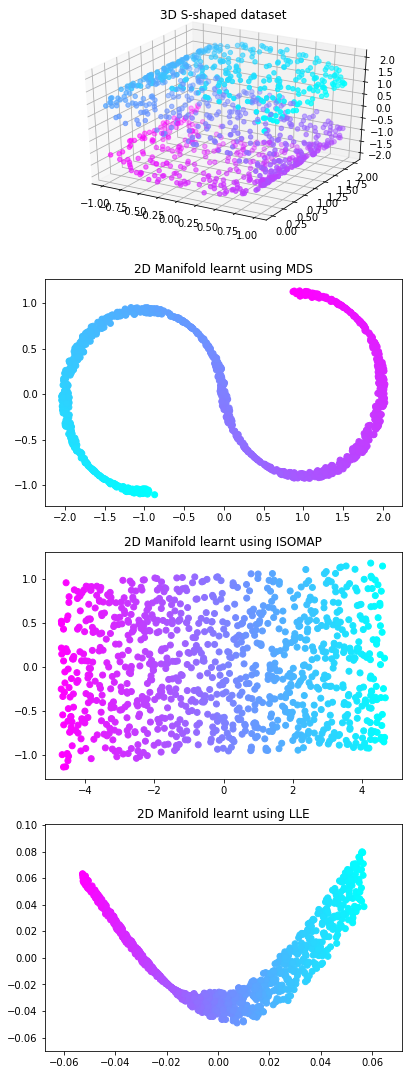

In [175]:
y_mds = MDS(SX, 10)
y_lle = LLE(SX, 25)
y_isomap = ISOMAP(SX, 35)

fig = plt.figure(figsize=[6.4, 4.8 * 4])

ax1 = fig.add_subplot(411, projection='3d')
ax1.set_title("3D S-shaped dataset")
ax1.scatter(SX[:, 0], SX[:, 1], SX[:, 2], c=St, cmap=plt.get_cmap('cool'))

ax2 = fig.add_subplot(412)
ax2.set_title("2D Manifold learnt using MDS")
ax2.scatter(y_mds[:, 0], y_mds[:, 1], c=St, cmap=plt.get_cmap('cool'))

ax4 = fig.add_subplot(413)
ax4.set_title("2D Manifold learnt using ISOMAP")
ax4.scatter(y_isomap[:, 0], y_isomap[:, 1], c=St, cmap=plt.get_cmap('cool'))

ax3 = fig.add_subplot(414)
ax3.set_title("2D Manifold learnt using LLE")
ax3.scatter(y_lle[:, 0], y_lle[:, 1], c=St, cmap=plt.get_cmap('cool'))

plt.plot()


# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [176]:
# Swiss roll dataset loading here
d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)

Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

[]

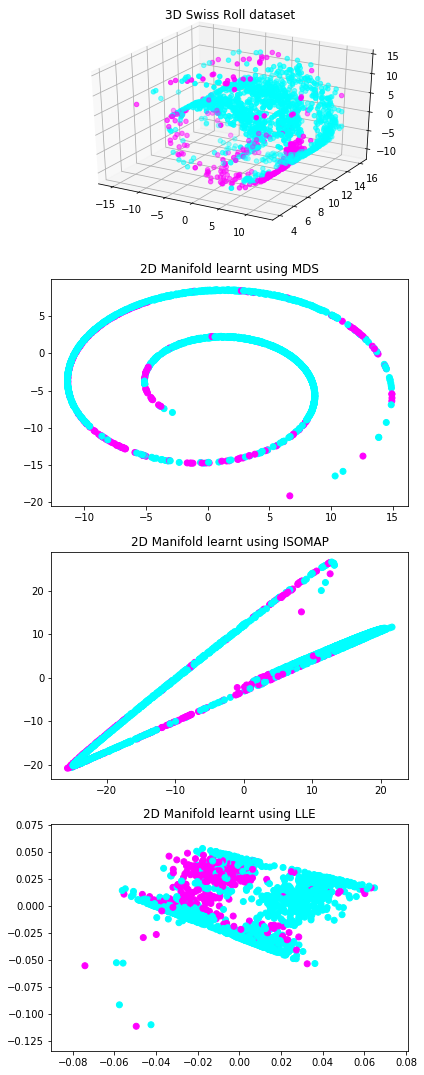

In [311]:
y = spectral_clustering(swissroll, eig=[1, 2])

y_mds = MDS(swissroll, 10)
y_lle = LLE(swissroll, 25)
y_isomap = ISOMAP(swissroll, 25)

fig = plt.figure(figsize=[6.4, 4.8 * 4])

ax1 = fig.add_subplot(411, projection='3d')
ax1.set_title("3D Swiss Roll dataset")
ax1.scatter(swissroll[:, 0], swissroll[:, 1], swissroll[:, 2], c=y, cmap=plt.get_cmap('cool'))

ax2 = fig.add_subplot(412)
ax2.set_title("2D Manifold learnt using MDS")
ax2.scatter(y_mds[:, 0], y_mds[:, 1], c=y, cmap=plt.get_cmap('cool'))

ax4 = fig.add_subplot(413)
ax4.set_title("2D Manifold learnt using ISOMAP")
ax4.scatter(y_isomap[:, 0], y_isomap[:, 1], c=y, cmap=plt.get_cmap('cool'))

ax3 = fig.add_subplot(414)
ax3.set_title("2D Manifold learnt using LLE")
ax3.scatter(y_lle[:, 0], y_lle[:, 1], c=y, cmap=plt.get_cmap('cool'))

plt.plot()

[]

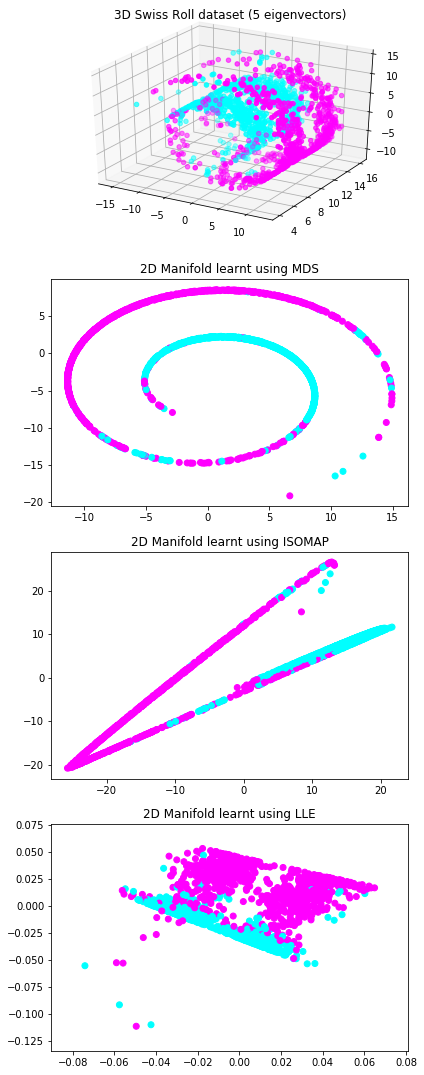

In [312]:
y = spectral_clustering(swissroll, eig=[1, 2, 3, 4, 5])

y_mds = MDS(swissroll, 10)
y_lle = LLE(swissroll, 25)
y_isomap = ISOMAP(swissroll, 25)

fig = plt.figure(figsize=[6.4, 4.8 * 4])

ax1 = fig.add_subplot(411, projection='3d')
ax1.set_title("3D Swiss Roll dataset (5 eigenvectors)")
ax1.scatter(swissroll[:, 0], swissroll[:, 1], swissroll[:, 2], c=y, cmap=plt.get_cmap('cool'))

ax2 = fig.add_subplot(412)
ax2.set_title("2D Manifold learnt using MDS")
ax2.scatter(y_mds[:, 0], y_mds[:, 1], c=y, cmap=plt.get_cmap('cool'))

ax4 = fig.add_subplot(413)
ax4.set_title("2D Manifold learnt using ISOMAP")
ax4.scatter(y_isomap[:, 0], y_isomap[:, 1], c=y, cmap=plt.get_cmap('cool'))

ax3 = fig.add_subplot(414)
ax3.set_title("2D Manifold learnt using LLE")
ax3.scatter(y_lle[:, 0], y_lle[:, 1], c=y, cmap=plt.get_cmap('cool'))

plt.plot()

[]

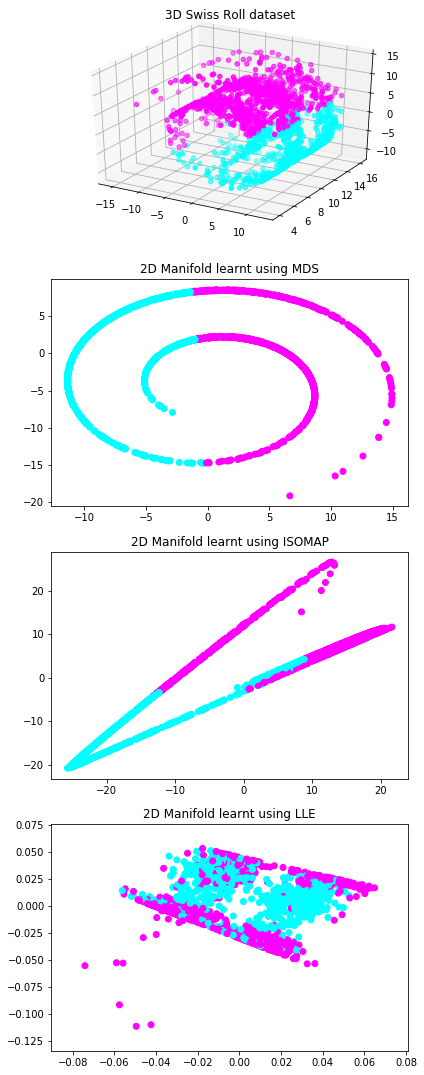

In [292]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)
kmeans.fit(swissroll)
y = kmeans.labels_

y_mds = MDS(swissroll, 10)
y_lle = LLE(swissroll, 25)
y_isomap = ISOMAP(swissroll, 25)

fig = plt.figure(figsize=[6.4, 4.8 * 4])

ax1 = fig.add_subplot(411, projection='3d')
ax1.set_title("3D Swiss Roll dataset")
ax1.scatter(swissroll[:, 0], swissroll[:, 1], swissroll[:, 2], c=y, cmap=plt.get_cmap('cool'))

ax2 = fig.add_subplot(412)
ax2.set_title("2D Manifold learnt using MDS")
ax2.scatter(y_mds[:, 0], y_mds[:, 1], c=y, cmap=plt.get_cmap('cool'))

ax4 = fig.add_subplot(413)
ax4.set_title("2D Manifold learnt using ISOMAP")
ax4.scatter(y_isomap[:, 0], y_isomap[:, 1], c=y, cmap=plt.get_cmap('cool'))

ax3 = fig.add_subplot(414)
ax3.set_title("2D Manifold learnt using LLE")
ax3.scatter(y_lle[:, 0], y_lle[:, 1], c=y, cmap=plt.get_cmap('cool'))

plt.plot()

We see that using the top 2 eigenvectors of the normalized Laplacian as features for k-means clustering, we get results that are somewhat similar to k-means clustering of the data itself. This is possibly because the approximation of the manifold with 2 eigenvectors is closer to a cylinder, and the clusters are on halves of the cylinder. The LLE projection shows clusters that are not homogenous, reflecting the fact that clustering is not along the manifold.

In k-means clustering, the points are divided along a plane cutting the roll in half, since the means likely converge to points on either side of the center of the roll. The LLE projection shows clusters that are not homogenous, reflecting the fact that clustering is not along the manifold.

We also see that if we use 5 eigenvectors of the normalized Laplacian as features for k-means clustering, we see clusters forming along the manifold. The inside part of the roll is clustered separately, and this also shows in the LLE projection as two clusters that are relatively homogeneous.



---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [239]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

Using TensorFlow backend.


170500096/170498071 [==============================] - 79s 0us/step


In [242]:
from sklearn.decomposition import PCA

def reductionUsingPCA(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    pca_X: numpy.array [n_samples, output_dim]
    """
    pca = PCA(output_dim)
    pca_X = pca.fit_transform(X)
    return pca_X

In [273]:
from sklearn.manifold import Isomap

def reductionUsingISOMAP(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    isomap_X: numpy.array [n_samples, output_dim]
    """
    isomap_X = ISOMAP(X, k, output_dim)
    return isomap_X

In [276]:
# Classification Algorithm 
# Extra functions here
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

def classification(x_train, y_train, x_test, y_test, n_classes):
    """Args:
    X: numpy.array [n_samples, input_dim]
    n_classes: number of classes

    Returns:
    labels: numpy_array [n_samples]
    """
    y_train = keras.utils.to_categorical(y_train, n_classes)
    y_test = keras.utils.to_categorical(y_test, n_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'],)

    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        verbose=2)

    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_test = np.argmax(y_test, axis=1)
    # print(y_pred.shape)
    f1 = F1_score(y_test, y_pred)
    return f1

In [267]:
from sklearn.metrics import f1_score

def F1_score(y_true, y_pred):
    """Args:
    y_true: numpy.array [n_samples] , ground truth value
    y_pred: numpy.array [n_samples] , predicted value by classifier

    Returns:
    score: float, f1-score
    """
    score = f1_score(y_true, y_pred, average='weighted')
    return score

In [269]:
X = np.vstack((X_train, X_test))

In [270]:
D = 256

In [285]:
reduced_X_pca = reductionUsingPCA(X, 0, D)
x_train_pca, x_test_pca = reduced_X_pca[:5000], reduced_X_pca[5000:]

In [274]:
reduced_X_iso = reductionUsingISOMAP(X, 25, D)
x_train_iso, x_test_iso = reduced_X_iso[:5000], reduced_X_iso[5000:]

In [286]:
pca_scores_1 = classification(x_train_pca, y_train, x_test_pca, y_test, 10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 530,442
Trainable params: 530,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 0s - loss: 99.2157 - accuracy: 0.2144
Epoch 2/20
 - 0s - loss: 18.1152 - accuracy: 0.2988
Epoch 3/20

In [278]:
iso_scores_1 = classification(x_train_iso, y_train, x_test_iso, y_test, 10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 399,370
Trainable params: 399,370
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 0s - loss: 255.4564 - accuracy: 0.1800
Epoch 2/20
 - 0s - loss: 39.8798 - accuracy: 0.2198
Epoch 3/2

/Users/saujasvs/.virtualenvs/smai/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [279]:
D = 512

In [283]:
reduced_X_pca = reductionUsingPCA(X, 0, D)
x_train_pca, x_test_pca = reduced_X_pca[:5000], reduced_X_pca[5000:]

In [281]:
reduced_X_iso = reductionUsingISOMAP(X, 25, D)
x_train_iso, x_test_iso = reduced_X_iso[:5000], reduced_X_iso[5000:]

In [284]:
pca_scores_2 = classification(x_train_pca, y_train, x_test_pca, y_test, 10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 530,442
Trainable params: 530,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 0s - loss: 91.8927 - accuracy: 0.2222
Epoch 2/20
 - 0s - loss: 15.8542 - accuracy: 0.2958
Epoch 3/20

In [287]:
iso_scores_2 = classification(x_train_iso, y_train, x_test_iso, y_test, 10)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 530,442
Trainable params: 530,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 0s - loss: 230.1690 - accuracy: 0.1880
Epoch 2/20
 - 0s - loss: 34.5181 - accuracy: 0.2290
Epoch 3/2

/Users/saujasvs/.virtualenvs/smai/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [288]:
pca_scores_1

0.31290444952406027

In [289]:
pca_scores_2

0.2922291451157485

In [290]:
iso_scores_1

0.09976323779120193

In [291]:
iso_scores_2

0.018865991276432858

We observe that the results of running a classifier on the PCA projections are far superior to the results of running a classifier on Isomap projections.

Isomap is a non-linear dimensionality reduction technique that tries to find a non-linear manifold of a lower dimension on which the data lies. The principle is that given enough points, the nearest neighbour or neighbourhood graph will accurately capture the shape of the underlying manifold.

CIFAR-10 images have a lot of variation within them, as opposed to the images given as examples in the Isomap paper. The Isomap paper presents examples like handwritten digit images and images of faces and hands taken from different angles that form an underlying non-linear manifold. These images are against the same, uniform background, and only the feature that varies along the manifold changes between images (shape of digit, position of hand, etc.). In the CIFAR-10 images, the same class of image has many different looking mambers of the class represented, with additional variation like background and scale among images.

With the high degree of variation in CIFAR-10 images, the amount of data to accurately characterize an underlying manifold is likely much larger than the number of images in the dataset. With only 6000 images, it is possible that Isomap finds an incorrect underlying manifold, and hence projects the points in a way that makes it even more difficult for a classifier to work correctly. PCA on the other hand only removes directions of low variance, and does not significantly distort relative positions of points, allowing the classifier to perform better.